In [134]:
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression

In [135]:
path = Path(r"../Resources/cities.csv")
cities = pd.read_csv(path)
# Clean data
cities = cities.drop(columns=["Unnamed: 0"]).set_index(["City"])
# Separate data by northern and southern hemispheres
northern_cities = cities.loc[cities["Latitude"] >= 0]
southern_cities = cities.loc[cities["Latitude"] < 0]
northern_cities.to_csv("../Resources/northern_cities.csv")
southern_cities.to_csv("../Resources/southern_cities.csv")
# Set  Xes and Ys and reshape to np array
x_north = northern_cities["Latitude"].values.reshape(-1, 1)
x_south = southern_cities["Latitude"].values.reshape(-1, 1)
y_temp_north = northern_cities["Max Temperature"].values.reshape(-1, 1)
y_temp_south = southern_cities["Max Temperature"].values.reshape(-1, 1)
y_hum_north = northern_cities["Humidity"].values.reshape(-1, 1)
y_hum_south = southern_cities["Humidity"].values.reshape(-1, 1)
y_cloud_north = northern_cities["Cloudiness"].values.reshape(-1, 1)
y_cloud_south = southern_cities["Cloudiness"].values.reshape(-1, 1)
y_wind_north = northern_cities["Wind Speed"].values.reshape(-1, 1)
y_wind_south = southern_cities["Wind Speed"].values.reshape(-1, 1)
north_temp_regressor = LinearRegression().fit(x_north, y_temp_north)
north_hum_regressor = LinearRegression().fit(x_north, y_hum_north)
north_cloud_regressor = LinearRegression().fit(x_north, y_cloud_north)
north_wind_regressor = LinearRegression().fit(x_north, y_wind_north)
south_temp_regressor = LinearRegression().fit(x_south, y_temp_south)
south_hum_regressor = LinearRegression().fit(x_south, y_hum_south)
south_cloud_regressor = LinearRegression().fit(x_south, y_cloud_south)
south_wind_regressor = LinearRegression().fit(x_south, y_wind_south)
northern_cities = northern_cities.copy()
southern_cities = southern_cities.copy()
northern_cities["Temperature Prediction"] = north_temp_regressor.predict(x_north)
northern_cities["Humidity Prediction"] = north_hum_regressor.predict(x_north)
northern_cities["Cloudiness Prediction"] = north_cloud_regressor.predict(x_north)
northern_cities["Wind Speed Prediction"] = north_wind_regressor.predict(x_north)
southern_cities["Temperature Prediction"] = south_temp_regressor.predict(x_south)
southern_cities["Humidity Prediction"] = south_hum_regressor.predict(x_south)
southern_cities["Cloudiness Prediction"] = south_cloud_regressor.predict(x_south)
southern_cities["Wind Speed Prediction"] = south_wind_regressor.predict(x_south)

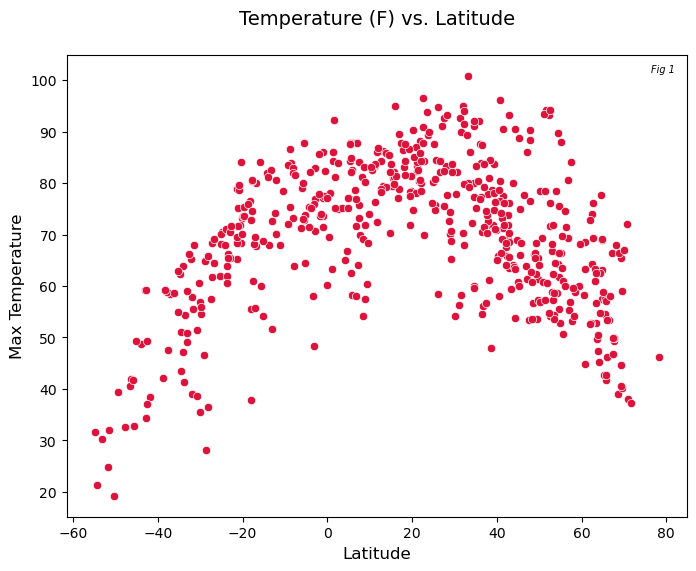

In [136]:
plt.subplots(figsize=(8, 6))
fig1 = sns.scatterplot(x="Latitude", y="Max Temperature", data=cities, color="crimson")
plt.title("Temperature (F) vs. Latitude\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 1",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
plt.savefig("fig1.png", dpi=300)
plt.show()

### Fig 1: Temperature (F) vs. Latitude

The above code generates a plot that displays the relationship between temperature and latitude by plotting temperature values at different latitudes, providing a visual representation of how temperature changes with varying latitudes.

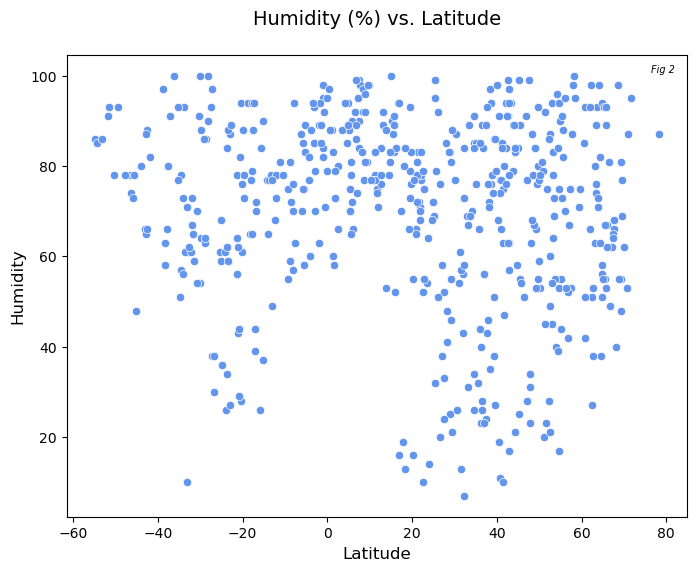

In [137]:
plt.subplots(figsize=(8, 6))
fig2 = sns.scatterplot(x="Latitude", y="Humidity", data=cities, color="cornflowerblue")
plt.title("Humidity (%) vs. Latitude\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 2",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
plt.savefig("fig2.png", dpi=300)
plt.show()

### Fig 2: Humidity (%) vs. Latitude

The above code analyzes the relationship between humidity percentage and latitude by generating a plot that visually represents the changes in humidity as latitude increases or decreases.

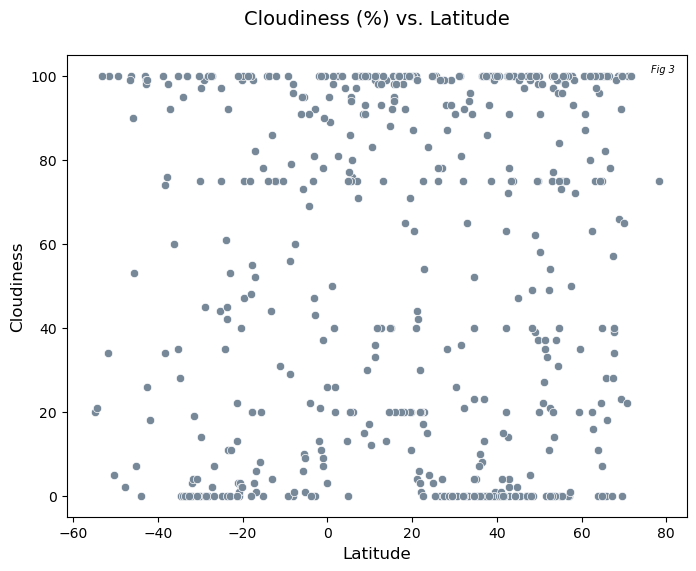

In [138]:
plt.subplots(figsize=(8, 6))
fig3 = sns.scatterplot(
    x="Latitude", y="Cloudiness", data=cities, color="lightslategrey"
)
plt.title("Cloudiness (%) vs. Latitude\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 3",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
plt.savefig("fig3.png", dpi=300)
plt.show()

### Fig 3: Cloudiness (%) vs. Latitude

The above code analyzes the relationship between cloudiness percentage and latitude by generating a plot that visually represents the changes in cloudiness as latitude increases or decreases.

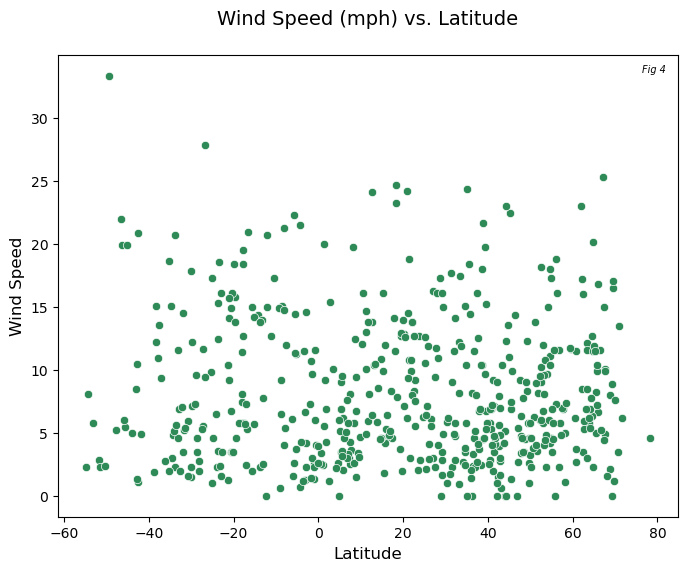

In [139]:
plt.subplots(figsize=(8, 6))
fig4 = sns.scatterplot(x="Latitude", y="Wind Speed", data=cities, color="seagreen")
plt.title("Wind Speed (mph) vs. Latitude\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 4",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
plt.savefig("fig4.png", dpi=300)
plt.show()

### Fig 4: Wind Speed (mph) vs. Latitude

The above code analyzes the relationship between wind speed and latitude by generating a plot that visually represents the changes in wind speed as latitude increases or decreases.

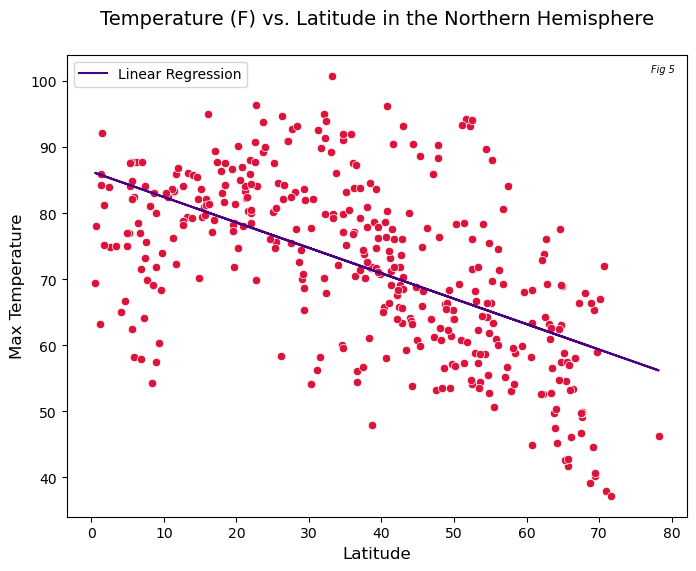

In [140]:
plt.subplots(figsize=(8, 6))
fig5 = sns.scatterplot(
    x="Latitude", y="Max Temperature", data=northern_cities, color="crimson"
)
plt.title("Temperature (F) vs. Latitude in the Northern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 5",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
northern_cities.plot(
    x="Latitude",
    y="Temperature Prediction",
    color="indigo",
    ax=fig5,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig5.png", dpi=300)
plt.show()

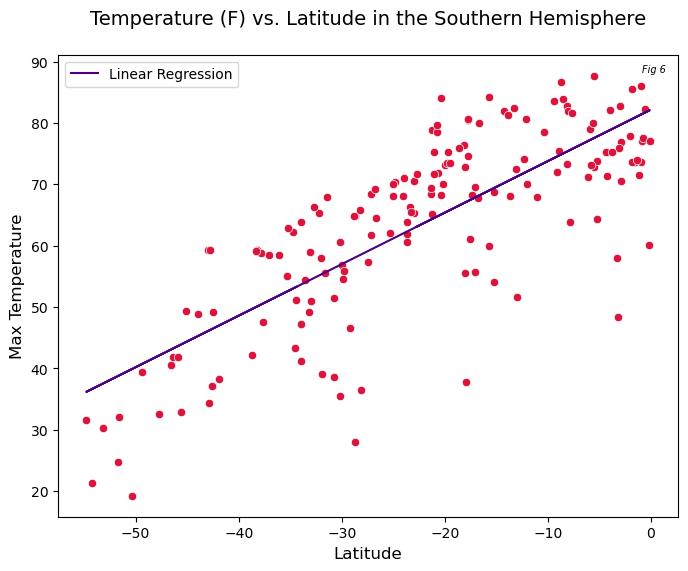

In [141]:
plt.subplots(figsize=(8, 6))
fig6 = sns.scatterplot(
    x="Latitude", y="Max Temperature", data=southern_cities, color="crimson"
)
plt.title("Temperature (F) vs. Latitude in the Southern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 6",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
southern_cities.plot(
    x="Latitude",
    y="Temperature Prediction",
    color="indigo",
    ax=fig6,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig6.png", dpi=300)
plt.show()

### Fig 5 and Fig 6 : Temperature (F) vs. Latitude in the Northern and Southern Hemispheres

These figures show the relationship between temperature and latitude in the
northern and southern hemispheres, respectively. The linear regression line
shows us that despite outliers (possibly caused by mountainous regions or
unique weather patterns) as we move closer to the equator (0 degrees latitude), the
temperature increases, and as we move further from the equator, the
temperature decreases.

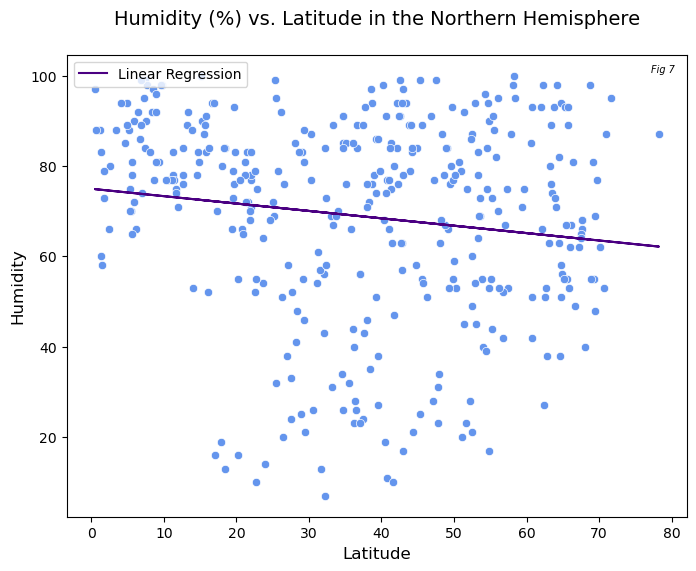

In [142]:
plt.subplots(figsize=(8, 6))
fig7 = sns.scatterplot(
    x="Latitude", y="Humidity", data=northern_cities, color="cornflowerblue"
)
plt.title("Humidity (%) vs. Latitude in the Northern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 7",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
northern_cities.plot(
    x="Latitude",
    y="Humidity Prediction",
    color="indigo",
    ax=fig7,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig7.png", dpi=300)
plt.show()

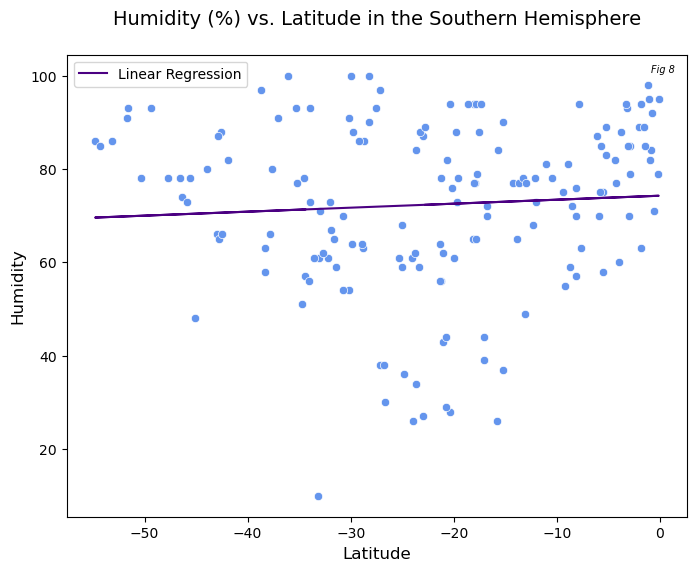

In [143]:
plt.subplots(figsize=(8, 6))
fig8 = sns.scatterplot(
    x="Latitude", y="Humidity", data=southern_cities, color="cornflowerblue"
)
plt.title("Humidity (%) vs. Latitude in the Southern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 8",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
southern_cities.plot(
    x="Latitude",
    y="Humidity Prediction",
    color="indigo",
    ax=fig8,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig8.png", dpi=300)
plt.show()

### Fig 7 and Fig 8 : Humidity (%) vs. Latitude in the Northern and Southern Hemispheres

These figures show the relationship between humidity and latitude in the
northern and southern hemispheres, respectively. The linear regression line
shows us that there is a slight correlation between humidity and latitude,
indicating that as we move closer to the equator (0 degrees latitude), the
humidity increases, and as we move further from the equator, the humidity
decreases. This is due to the fact that the sun shines most on the equator,
causing a greater ammount of water from the oceans and land to evaporate, thus increasing the humidity.

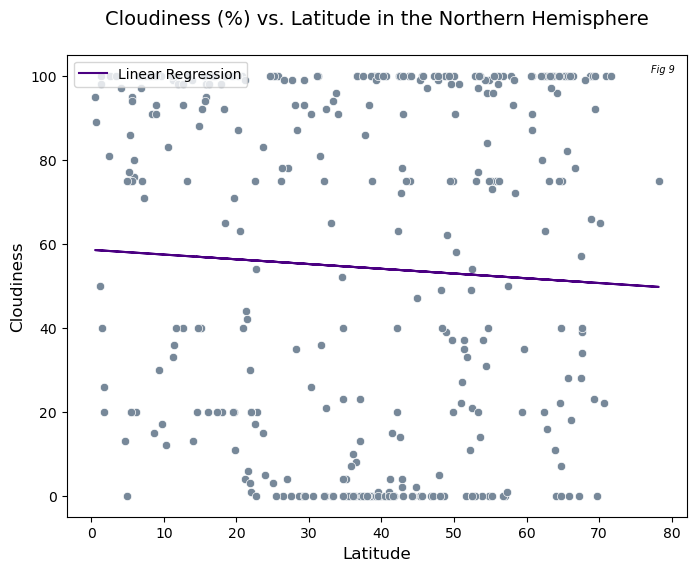

In [144]:
plt.subplots(figsize=(8, 6))
fig9 = sns.scatterplot(
    x="Latitude", y="Cloudiness", data=northern_cities, color="lightslategrey"
)
plt.title("Cloudiness (%) vs. Latitude in the Northern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 9",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
northern_cities.plot(
    x="Latitude",
    y="Cloudiness Prediction",
    color="indigo",
    ax=fig9,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig9.png", dpi=300)
plt.show()

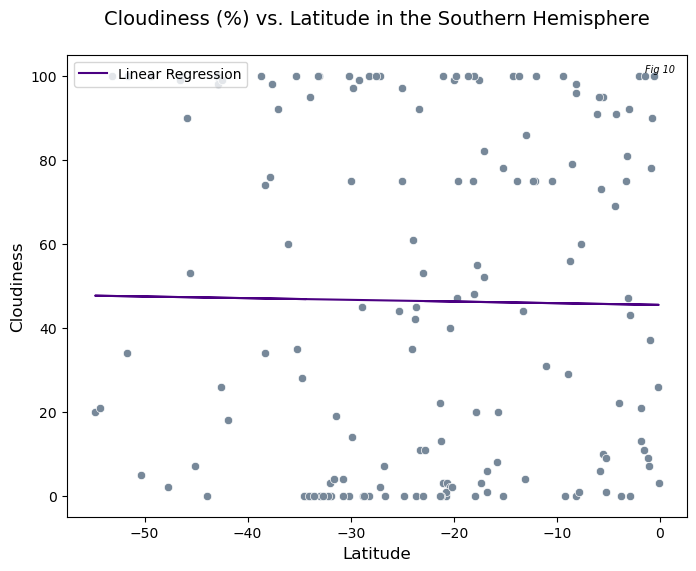

In [145]:
plt.subplots(figsize=(8, 6))
fig10 = sns.scatterplot(
    x="Latitude", y="Cloudiness", data=southern_cities, color="lightslategrey"
)
plt.title("Cloudiness (%) vs. Latitude in the Southern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 10",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
southern_cities.plot(
    x="Latitude",
    y="Cloudiness Prediction",
    color="indigo",
    ax=fig10,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig10.png", dpi=300)
plt.show()

### Fig 9 and Fig 10 : Cloudiness (%) vs. Latitude in the Northern and Southern Hemispheres

These figures show the relationship between cloudiness and latitude in the
northern and southern hemispheres, respectively. The linear regression line
shows us that there is no correlation between cloudiness and latitude.

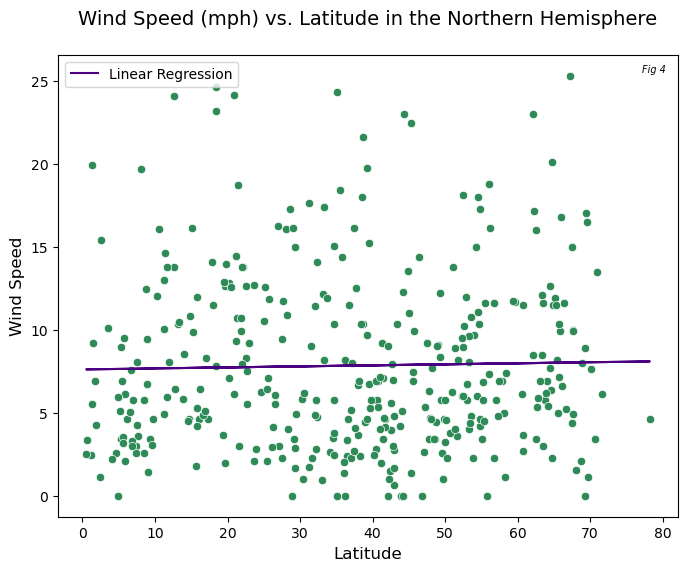

In [146]:
plt.subplots(figsize=(8, 6))
fig11 = sns.scatterplot(
    x="Latitude", y="Wind Speed", data=northern_cities, color="seagreen"
)
plt.title("Wind Speed (mph) vs. Latitude in the Northern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 4",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
northern_cities.plot(
    x="Latitude",
    y="Wind Speed Prediction",
    color="indigo",
    ax=fig11,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig11.png", dpi=300)
plt.show()

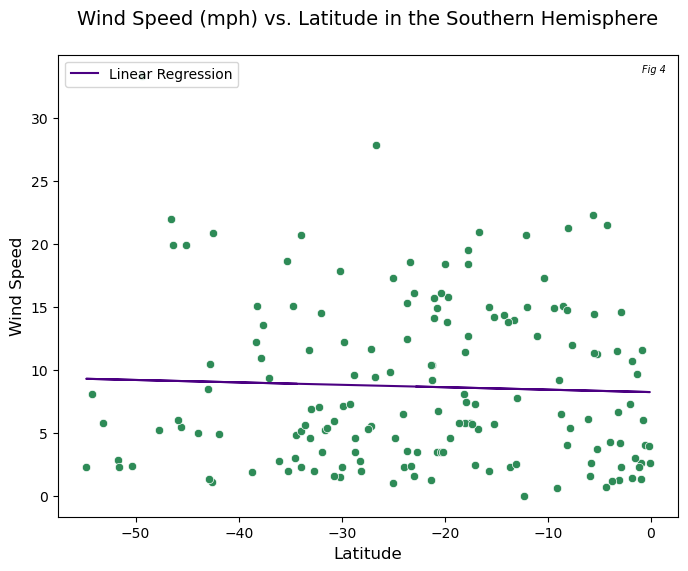

In [147]:
plt.subplots(figsize=(8, 6))
fig12 = sns.scatterplot(
    x="Latitude", y="Wind Speed", data=southern_cities, color="seagreen"
)
plt.title("Wind Speed (mph) vs. Latitude in the Southern Hemisphere\n", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.text(
    0.98,
    0.98,
    "Fig 4",
    transform=plt.gca().transAxes,
    fontsize=7,
    fontstyle="italic",
    va="top",
    ha="right",
)
southern_cities.plot(
    x="Latitude",
    y="Wind Speed Prediction",
    color="indigo",
    ax=fig12,
    label="Linear Regression",
)
plt.legend(loc="upper left")
plt.savefig("fig12.png", dpi=300)
plt.show()

### Fig 11 and Fig 12 : Wind Speed (mph) vs. Latitude in the Northern and Southern Hemispheres

These figures show the relationship between wind speed and latitude in the northern and southern hemispheres, respectively. The linear regression line
shows us that there is a minimal correlation between wind speed and latitude,
as we move closer to the equator (0 degrees latitude), the wind speed
decreases, and as we move further from the equator, the wind speed increases.